<a href="https://colab.research.google.com/github/didi-d92/Salary-Prediction-Project/blob/main/1LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


#Downloading the data frame

In [2]:
df= pd.read_csv('/content/Salary_Data.csv', low_memory=False)

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


#Exploring data set

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


In [5]:
print(df.shape)

(6704, 6)


In [6]:
print(df.describe())

               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


#Handeling problems with null vales

In [7]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


KNNImputer

In [8]:
pip install pandas scikit-learn


In [9]:
from sklearn.impute import KNNImputer


Gender : 1 = male / Female= 0

In [10]:
df['Gender']= df['Gender'].map({'Male': 1, 'Female':0 })

In [11]:
df['Gender'].head()

,Gender
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


#KNNImputer for missing data

In [12]:
columns_with_numbers= df.select_dtypes(include=[np.number]).columns

In [13]:
numerical_df= df[columns_with_numbers]

In [14]:
imputer = KNNImputer(n_neighbors=3)


In [15]:
impute_numerical_df=pd.DataFrame(imputer.fit_transform(numerical_df), columns=columns_with_numbers)

In [16]:
df[columns_with_numbers] = impute_numerical_df

In [17]:
print("DataFrame después de la imputación solo en columnas numéricas:")
print(df)

DataFrame después de la imputación solo en columnas numéricas:
       Age  Gender    Education Level              Job Title  \
0     32.0     1.0         Bachelor's      Software Engineer   
1     28.0     0.0           Master's           Data Analyst   
2     45.0     1.0                PhD         Senior Manager   
3     36.0     0.0         Bachelor's        Sales Associate   
4     52.0     1.0           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0     0.0                PhD  Director of Marketing   
6700  32.0     1.0        High School        Sales Associate   
6701  30.0     0.0  Bachelor's Degree      Financial Manager   
6702  46.0     1.0    Master's Degree      Marketing Manager   
6703  26.0     0.0        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3               

In [18]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


CAtegoric values

In [19]:
df.loc[df['Job Title'].isnull(), 'Job Title'] = df['Job Title'].mode()[0]
df.loc[df['Education Level'].isnull(), 'Education Level'] = df['Education Level'].mode()[0]

In [20]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [21]:
print(df.duplicated().sum())

4913


In [22]:
duplicated= df.duplicated()

In [23]:
duplicated_total= duplicated.sum()

In [24]:
if duplicated_total > 0:
    print("Filas duplicadas:")
    print(df[duplicated])
else:
    print("No hay filas duplicadas en el DataFrame.")

Filas duplicadas:
       Age  Gender    Education Level                              Job Title  \
195   28.0     1.0         Bachelor's                Junior Business Analyst   
250   30.0     0.0         Bachelor's           Junior Marketing Coordinator   
251   38.0     1.0           Master's                   Senior IT Consultant   
252   45.0     0.0                PhD                Senior Product Designer   
253   28.0     1.0         Bachelor's  Junior Business Development Associate   
...    ...     ...                ...                                    ...   
6699  49.0     0.0                PhD                  Director of Marketing   
6700  32.0     1.0        High School                        Sales Associate   
6701  30.0     0.0  Bachelor's Degree                      Financial Manager   
6702  46.0     1.0    Master's Degree                      Marketing Manager   
6703  26.0     0.0        High School                        Sales Executive   

      Years of Experi

I didn't do nothing with duplicated values because they weren't a problem as you can see above

#EDA

#Salary

the data set contains salary information from multiple companies and a possible explanation for lower outliers it's they are from countries were these positions are pay less than in others.

In [25]:
sns.set(style='whitegrid', context='notebook')

(6704, 6)


<Axes: >

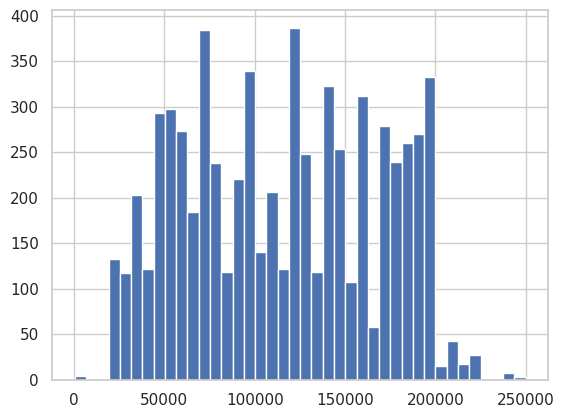

In [26]:
print(df.shape)
df.Salary.hist(bins = 40)

salary biases

In [76]:
from scipy.stats import skew


In [77]:
skewness = skew(df['Salary'])
print(f'Sesgo de los salarios: {skewness}')

Sesgo de los salarios: 0.05857833505188359


Outliers

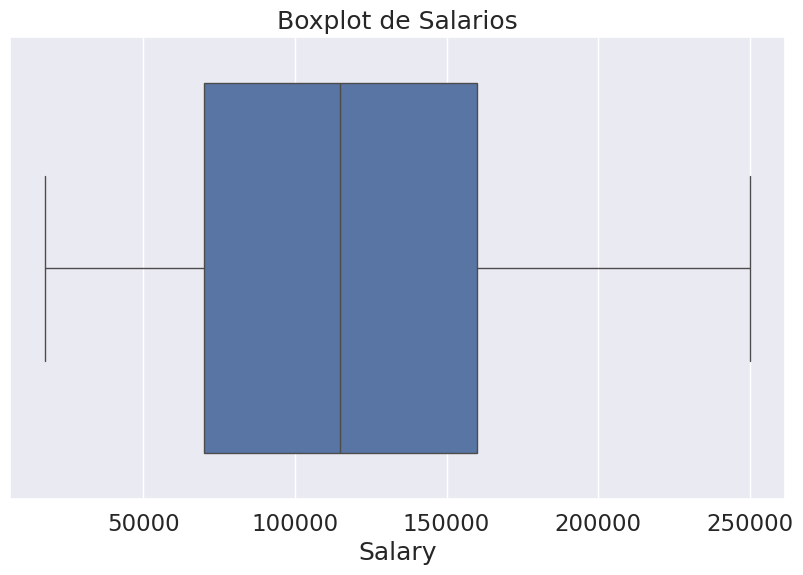

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot de Salarios')
plt.xlabel('Salary')
plt.show()

Exploring salaries ranges:

Even though there are no outliers, I want to explore why there are some salaries higher and lower at the end and beginning of the histogram.

In [28]:
low_salaries= df[(df['Salary'] >= 0) & (df['Salary'] <= 5000)]

In [29]:
print("Salarios entre 0 y 5000:")
print(low_salaries[['Job Title', 'Salary']])

Salarios entre 0 y 5000:
                               Job Title  Salary
259   Junior Business Operations Analyst   350.0
1890                 Front end Developer   550.0
2654           Software Engineer Manager   579.0
4633               Junior HR Coordinator   500.0


*it's pretty weird that a Software Engineer Manager eran less than just a Software Engineer as we are gonna see next

In [30]:
high_salaries= df[(df['Salary'] >= 18000) & (df['Salary'] <= 250000)]

In [31]:
print("\nSalarios entre 18000 y 250000:")
print(high_salaries[['Job Title', 'Salary']])


Salarios entre 18000 y 250000:
                  Job Title    Salary
0         Software Engineer   90000.0
1              Data Analyst   65000.0
2            Senior Manager  150000.0
3           Sales Associate   60000.0
4                  Director  200000.0
...                     ...       ...
6699  Director of Marketing  200000.0
6700        Sales Associate   50000.0
6701      Financial Manager   55000.0
6702      Marketing Manager  140000.0
6703        Sales Executive   35000.0

[6700 rows x 2 columns]


In [32]:
software_engineer_manager = df[df['Job Title'] == 'Software Engineer Manager']

In [33]:
print("Registros de Software Engineer Manager:")
print(software_engineer_manager[['Job Title', 'Salary']])

Registros de Software Engineer Manager:
                      Job Title    Salary
1202  Software Engineer Manager  190000.0
1211  Software Engineer Manager  200000.0
1214  Software Engineer Manager  195000.0
1220  Software Engineer Manager  190000.0
1223  Software Engineer Manager  195000.0
...                         ...       ...
3108  Software Engineer Manager  154990.0
3112  Software Engineer Manager  192211.0
3120  Software Engineer Manager  182013.0
3123  Software Engineer Manager  183530.0
3132  Software Engineer Manager  151310.0

[376 rows x 2 columns]


Low_salaries imputation

I didn't want to deal later with problem of having some low numbers outside the mode or median, so as they were a few i decided better to replace them by the mean than delete or leave it like that

In [34]:
mean_by_job_title = df.groupby('Job Title')['Salary'].mean()


In [35]:
for index, row in df.iterrows():
    if row['Salary'] < 3000:
        df.at[index, 'Salary'] = mean_by_job_title[row['Job Title']]

* i want to check waht's like after the imputation

(6704, 6)


<Axes: >

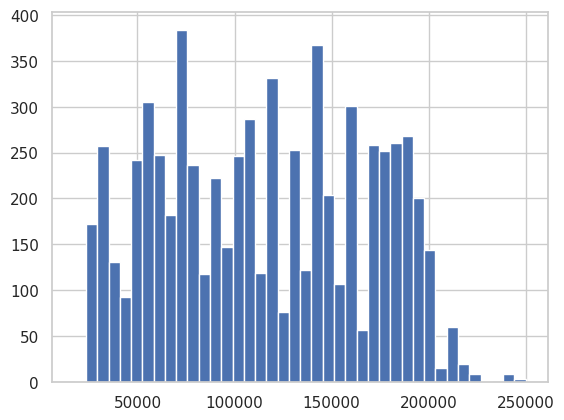

In [36]:
print(df.shape)
df.Salary.hist(bins = 40)

In [37]:
from scipy.stats import skew


In [38]:
skewness = skew(df['Salary'])
print(f'Sesgo de los salarios: {skewness}')

Sesgo de los salarios: 0.06003149757484613


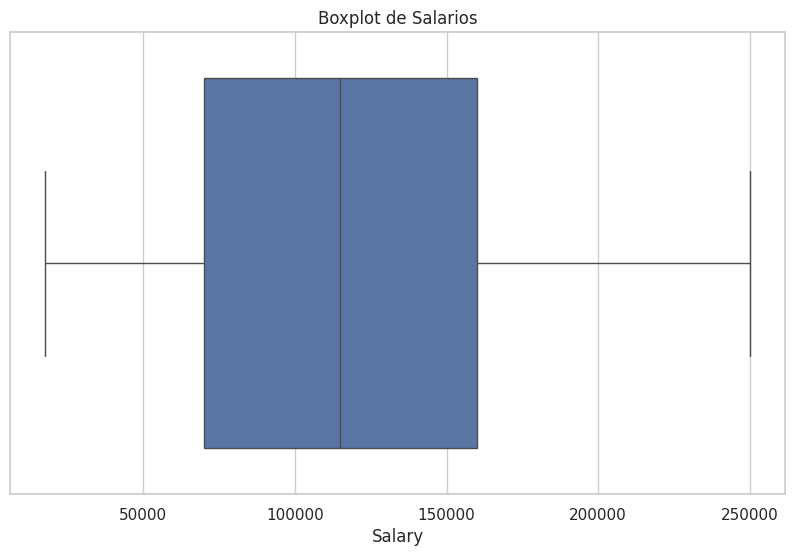

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot de Salarios')
plt.xlabel('Salary')
plt.show()

Exploring high salaries

In [40]:
high_salary_df = df[df['Salary'] >= 250000]


In [41]:
print(high_salary_df)


       Age  Gender    Education Level                 Job Title  \
30    50.0     1.0         Bachelor's                       CEO   
83    52.0     1.0                PhD  Chief Technology Officer   
5001  45.0     1.0  Bachelor's Degree         Financial Manager   

      Years of Experience    Salary  
30                   25.0  250000.0  
83                   24.0  250000.0  
5001                 21.0  250000.0  


In [42]:
titles_of_interest = ['CEO', 'Chief Technology Officer', 'Financial Manager']
filtered_df = df[df['Job Title'].isin(titles_of_interest)]

In [43]:
counts = filtered_df['Job Title'].value_counts()


In [44]:
print("Conteo de Títulos de Trabajo:")
print(counts)

Conteo de Títulos de Trabajo:
Job Title
Financial Manager           134
CEO                           1
Chief Technology Officer      1
Name: count, dtype: int64


As you can see in here, the only weird salary it's for the financial manager

In [45]:
salary_avg = filtered_df.groupby('Job Title')['Salary'].mean()


In [46]:
print("\nSalario Promedio por Título de Trabajo:")
print(salary_avg)


Salario Promedio por Título de Trabajo:
Job Title
CEO                         250000.000000
Chief Technology Officer    250000.000000
Financial Manager           143059.701493
Name: Salary, dtype: float64


In [47]:
salary_mode = df[df['Job Title'] != 'Financial Manager']['Salary'].mode()[0]


In [48]:
df.loc[(df['Job Title'] == 'Financial Manager') & (df['Salary'] == 250000), 'Salary'] = salary_mode


So just to make sure i decided to switch for the mode

In [49]:
updated_financial_manager = df[df['Job Title'] == 'Financial Manager']
print("Registro actualizado del Financial Manager:")
print(updated_financial_manager)

Registro actualizado del Financial Manager:
       Age  Gender    Education Level          Job Title  Years of Experience  \
24    41.0     1.0           Master's  Financial Manager                 13.0   
4887  30.0     1.0    Master's Degree  Financial Manager                  7.0   
4900  30.0     1.0    Master's Degree  Financial Manager                  7.0   
4913  30.0     1.0    Master's Degree  Financial Manager                  7.0   
4926  30.0     1.0    Master's Degree  Financial Manager                  7.0   
...    ...     ...                ...                ...                  ...   
6645  30.0     0.0  Bachelor's Degree  Financial Manager                  4.0   
6662  42.0     1.0  Bachelor's Degree  Financial Manager                 13.0   
6673  30.0     0.0  Bachelor's Degree  Financial Manager                  4.0   
6690  42.0     1.0  Bachelor's Degree  Financial Manager                 13.0   
6701  30.0     0.0  Bachelor's Degree  Financial Manager         

In [50]:
print("\nSalario Promedio por Título de Trabajo:")
print(salary_avg)


Salario Promedio por Título de Trabajo:
Job Title
CEO                         250000.000000
Chief Technology Officer    250000.000000
Financial Manager           143059.701493
Name: Salary, dtype: float64


#Analyzing correlation

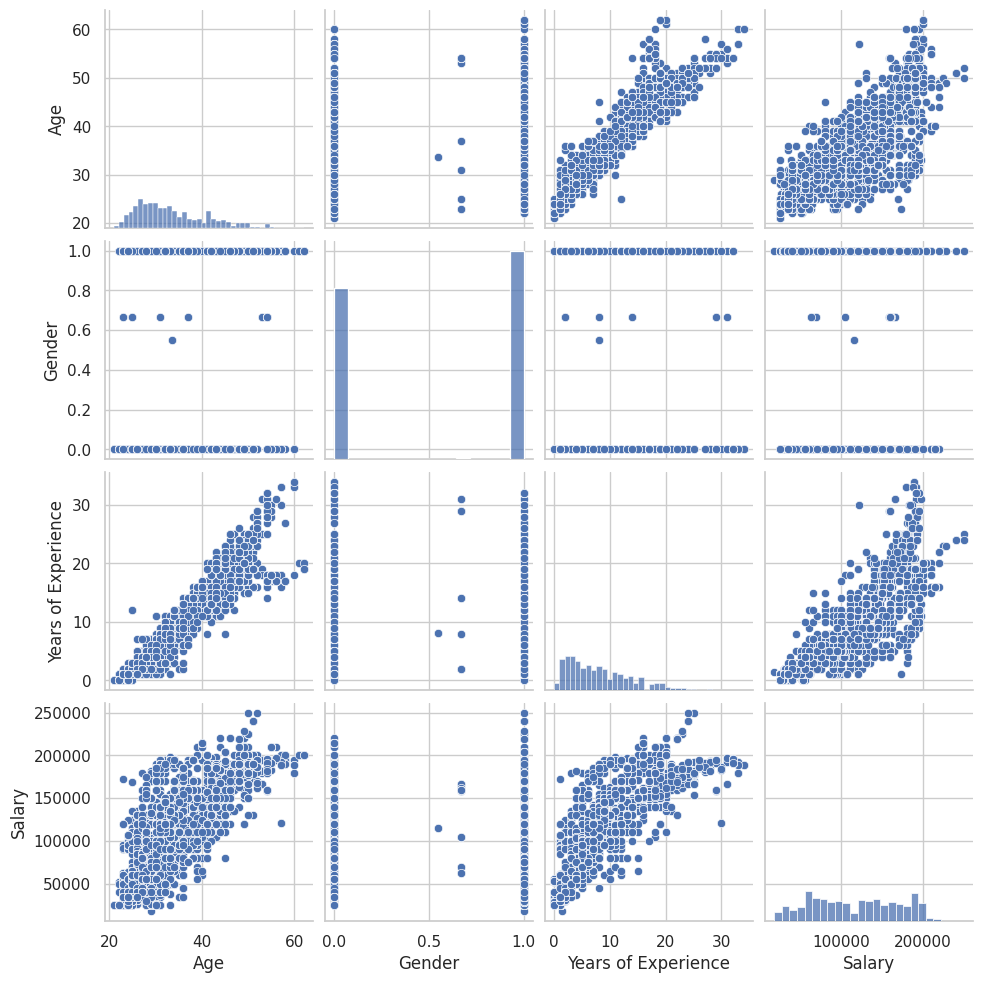

In [51]:
sns.pairplot(df, height=2.5)
plt.show()

<Axes: >

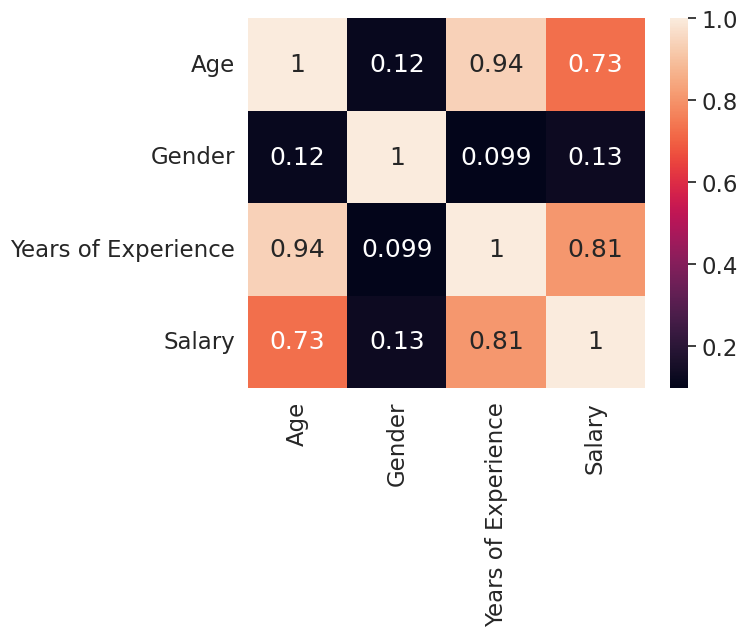

In [52]:
numeric_cols = ['Age', 'Gender', 'Years of Experience', 'Salary']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols,xticklabels=numeric_cols)

In [53]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0.0,Master's,Data Analyst,3.0,65000.0
2,45.0,1.0,PhD,Senior Manager,15.0,150000.0
3,36.0,0.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1.0,Master's,Director,20.0,200000.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6704 non-null   float64
 1   Gender               6704 non-null   float64
 2   Education Level      6704 non-null   object 
 3   Job Title            6704 non-null   object 
 4   Years of Experience  6704 non-null   float64
 5   Salary               6704 non-null   float64
dtypes: float64(4), object(2)
memory usage: 314.4+ KB


In [55]:
print(df['Job Title'].unique())
print(df['Education Level'].unique())

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [56]:
df['Job Title'] = df['Job Title'].astype(str)
df['Education Level'] = df['Education Level'].astype(str)

#Get_dummies for categoric variables

In [57]:
df = pd.get_dummies(df, columns=['Job Title', 'Education Level'], drop_first=True)


In [58]:
print(df.head())


    Age  Gender  Years of Experience    Salary  Job Title_Accountant  \
0  32.0     1.0                  5.0   90000.0                 False   
1  28.0     0.0                  3.0   65000.0                 False   
2  45.0     1.0                 15.0  150000.0                 False   
3  36.0     0.0                  7.0   60000.0                 False   
4  52.0     1.0                 20.0  200000.0                 False   

   Job Title_Administrative Assistant  Job Title_Back end Developer  \
0                               False                         False   
1                               False                         False   
2                               False                         False   
3                               False                         False   
4                               False                         False   

   Job Title_Business Analyst  Job Title_Business Development Manager  \
0                       False                                   Fal

In [59]:
bool_columns = df.select_dtypes(include='bool').columns


In [60]:
df[bool_columns] = df[bool_columns].astype(int)


In [61]:
print("\nDataFrame después de la conversión:")
print(df)


DataFrame después de la conversión:
       Age  Gender  Years of Experience    Salary  Job Title_Accountant  \
0     32.0     1.0                  5.0   90000.0                     0   
1     28.0     0.0                  3.0   65000.0                     0   
2     45.0     1.0                 15.0  150000.0                     0   
3     36.0     0.0                  7.0   60000.0                     0   
4     52.0     1.0                 20.0  200000.0                     0   
...    ...     ...                  ...       ...                   ...   
6699  49.0     0.0                 20.0  200000.0                     0   
6700  32.0     1.0                  3.0   50000.0                     0   
6701  30.0     0.0                  4.0   55000.0                     0   
6702  46.0     1.0                 14.0  140000.0                     0   
6703  26.0     0.0                  1.0   35000.0                     0   

      Job Title_Administrative Assistant  Job Title_Back end D

In [62]:
pd.set_option('display.max_rows', None)

In [63]:
pd.set_option('display.max_columns', None)

In [64]:
correlation_matrix = df.corr()
print(correlation_matrix['Salary'].sort_values(ascending=False))

Salary                                             1.000000
Years of Experience                                0.808450
Age                                                0.727489
Education Level_PhD                                0.484856
Job Title_Software Engineer Manager                0.266486
Job Title_Data Scientist                           0.259291
Job Title_Senior Project Engineer                  0.215441
Education Level_Master's                           0.169891
Job Title_Director of Data Science                 0.156765
Job Title_Senior Software Engineer                 0.132693
Job Title_Marketing Director                       0.127867
Gender                                             0.127361
Job Title_Product Manager                          0.113932
Education Level_Master's Degree                    0.102347
Job Title_Research Director                        0.096856
Job Title_Research Scientist                       0.096785
Job Title_Financial Manager             

## Fist model : applying all variables

I don't personally like to apply all the possible characteristics in X when I'm doing a linear regression prediction, but I know it's a good practice, so I decided to go for it first.

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
X_cols = list(set(df.columns)-set(['Salary']))
y_col = ['Salary']


In [67]:
X = df[X_cols].values
y = df[y_col].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [69]:
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)


In [70]:
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [71]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [72]:
y_pred.shape

(1676, 1)

In [73]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [74]:
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")
print("mse: ", round(mse, 4))

Coeficiente de Determinación (R^2): -662282370207862134199549952.00
mse:  6.450771802871055e+26


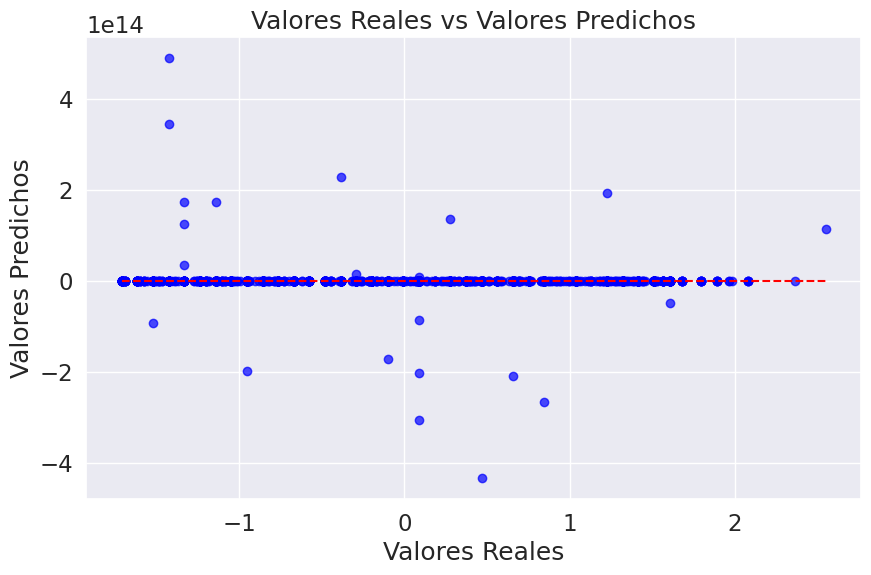

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.grid(True)
plt.show()

Conclusions: It's not even acceptable, so I'm going to try out other alternatives to optimize the model.

#Secoond Model

This time i will try the characteristics i'm more interesting in after the correlation analysis

In [79]:
X_cols= ['Years of Experience', 'Age', 'Education Level_PhD',
         'Job Title_Software Engineer Manager', 'Job Title_Data Scientist']

In [80]:
y_col = ['Salary']

In [81]:
X = df[X_cols].values
y = df[y_col].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [83]:
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

In [84]:
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [85]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [86]:
y_pred.shape

(1676, 1)

In [87]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [88]:
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")
print("mse: ", round(mse, 4))

Coeficiente de Determinación (R^2): 0.69
mse:  0.3046


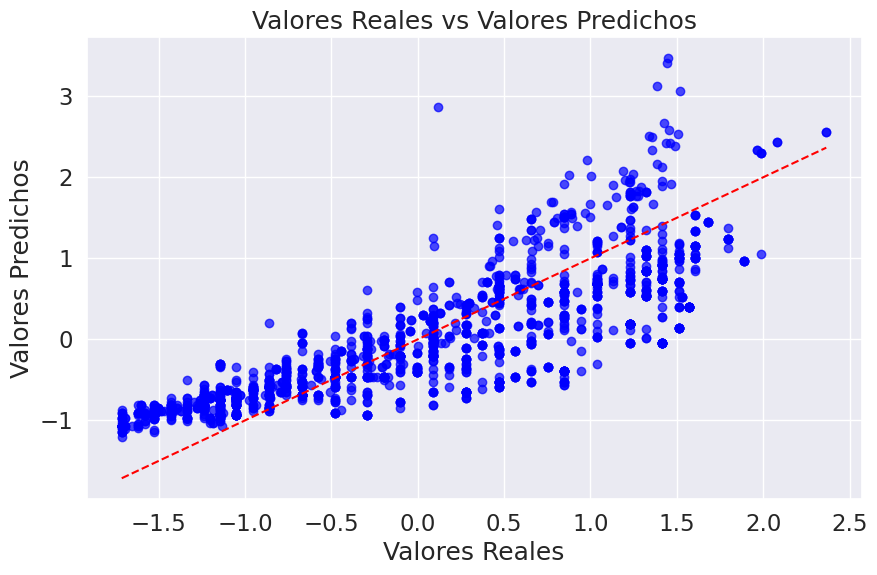

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.grid(True)
plt.show()

Conclusion: a 0.69% it's pretty good , i've tried take out other characteristics but i didn't make any difference or it made it worst so decided to keep this model.

There's space for improvement?
I'm aware there're other models that may fit better the data, but this is a linear regression project so i will keep it this way. You will see i will measure the overfit next but it wasn't something to work on so this it's the best model i could find and for salary calculation is more than fine.

#Overfitting analysis

In [90]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score


In [92]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [93]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE en el conjunto de entrenamiento: {rmse_train:.2f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.2f}")

RMSE en el conjunto de entrenamiento: 0.56
RMSE en el conjunto de prueba: 0.55


#cross validation


In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores.mean())

print(f"RMSE promedio en validación cruzada (5-fold): {cv_rmse:.2f}")

RMSE promedio en validación cruzada (5-fold): 0.56


In [96]:
if rmse_test > rmse_train:
    print("\nPosible sobreajuste detectado: el error en el conjunto de prueba es significativamente mayor que en el entrenamiento.")
else:
    print("\nEl modelo parece generalizar bien: el error en el conjunto de prueba es similar al de entrenamiento.")


El modelo parece generalizar bien: el error en el conjunto de prueba es similar al de entrenamiento.
